In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:

my_df = pd.read_csv(r'/Users/dslearner23/Downloads/Police_data.csv')
print(my_df)

       stop_date stop_time  country_name driver_gender  driver_age_raw  \
0       1/2/2005      1:55           NaN             M          1985.0   
1      1/18/2005      8:15           NaN             M          1965.0   
2      1/23/2005     23:15           NaN             M          1972.0   
3      2/20/2005     17:15           NaN             M          1986.0   
4      3/14/2005     10:00           NaN             F          1984.0   
...          ...       ...           ...           ...             ...   
65530  12/6/2012     17:54           NaN             F          1987.0   
65531  12/6/2012     22:22           NaN             M          1954.0   
65532  12/6/2012     23:20           NaN             M          1985.0   
65533  12/7/2012      0:23           NaN           NaN             NaN   
65534  12/7/2012      0:30           NaN             F          1985.0   

       driver_age driver_race                   violation_raw  violation  \
0            20.0       White      

DATA CLEANING

CHECK IF MY DATASET HAS NULL VALUES

In [5]:
# Check accross all cell for NaN values
value = my_df.isnull().values.any()
print(value)

True


COUNT THE NUMBER OF NULL VALUES

In [6]:
my_df.isnull().sum()


stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [7]:
# Get Total Count of all Columns
count = my_df.isnull().sum().sum()
print('Number of NaN values present: ' +str(count))

Number of NaN values present: 165373


REMOVE NULL COLUMNS country_name AND search_type

In [8]:
my_df.drop(['country_name', 'search_type'], axis=1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False


In [9]:
my_df.dtypes


stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [10]:
my_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
65530    False
65531    False
65532    False
65533    False
65534    False
Length: 65535, dtype: bool

/Users/dslearner23/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Speeding'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Equipment'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

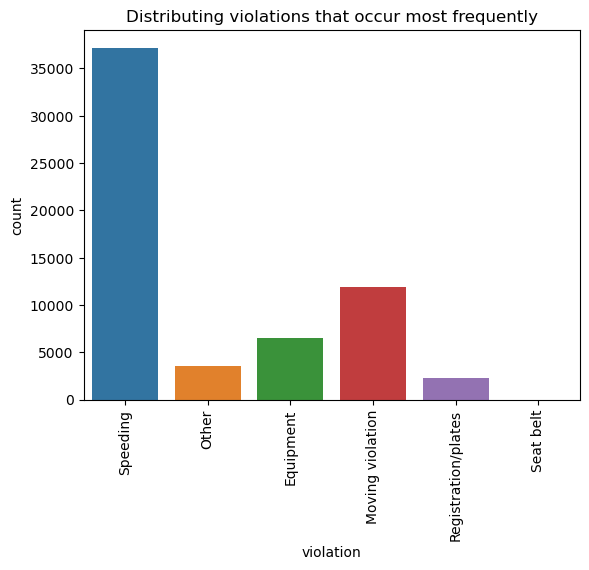

In [11]:
sn.countplot(my_df.violation)
plt.title('Distributing violations that occur most frequently')
plt.xticks(rotation=90)

In [12]:
my_df['stopdate'] = pd.DatetimeIndex(my_df['stop_date']).month
my_df

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopdate
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,12
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,12
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,12
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,12


In [13]:
my_df.drop(['stop_date'], axis=1)

,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopdate
0,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
1,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
2,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1
3,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2
4,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,12
65531,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,12
65532,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,12
65533,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,12


/Users/dslearner23/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Other')])

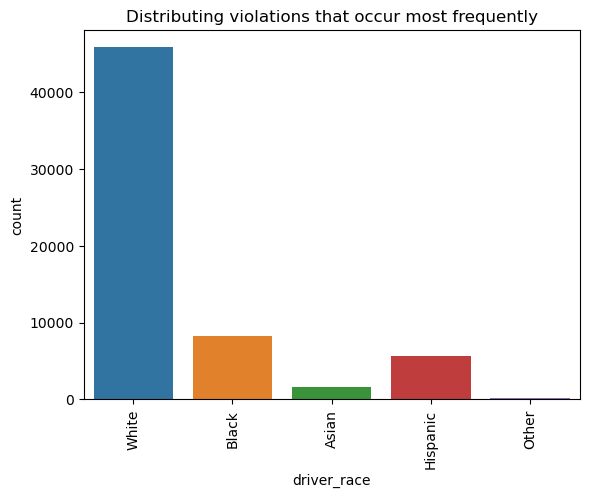

In [29]:

sn.countplot(my_df.driver_race)
plt.title('Distributing the number of drivers by race')
plt.xticks(rotation=90)



/Users/dslearner23/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

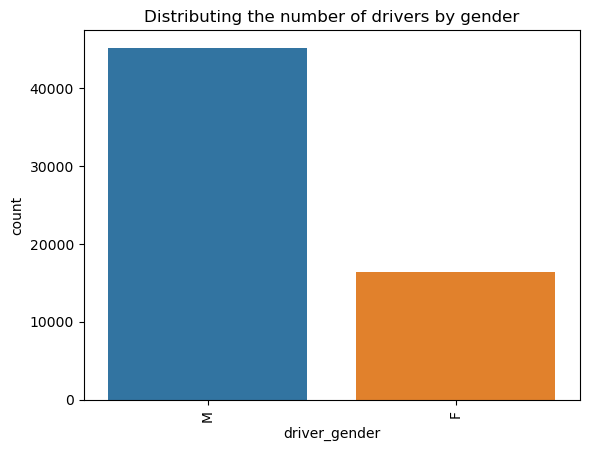

In [30]:
sn.countplot(my_df.driver_gender)
plt.title('Distributing the number of drivers by gender')
plt.xticks(rotation=90)

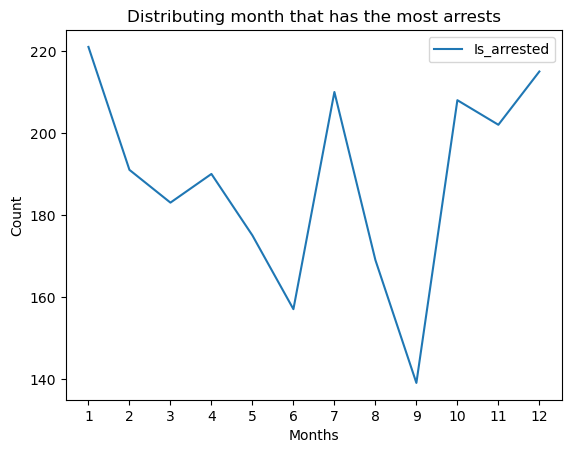

In [14]:
difference= my_df.groupby(['stopdate','is_arrested']).count().reset_index()
difference = difference[difference['is_arrested'] == True]

difference.plot(x='stopdate',y='stop_date',kind='line',title='Distributing month that has the most arrests',xticks=[1,2,3,4,5,6,7,8,9,10,11,12],xlabel='Months',ylabel='Count')
plt.legend(['Is_arrested'])

<AxesSubplot:title={'center':'Distributing the number of drivers who were arrested vs those who were not by gender'}, xlabel='driver_gender'>

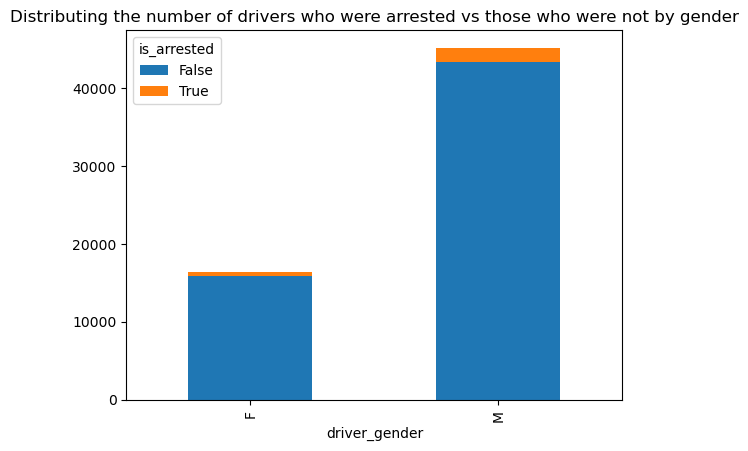

In [15]:
my_df.groupby(['driver_gender', 'is_arrested']).size().unstack().plot(kind='bar', stacked=True, title='Distributing the number of drivers who were arrested vs those who were not by gender')

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

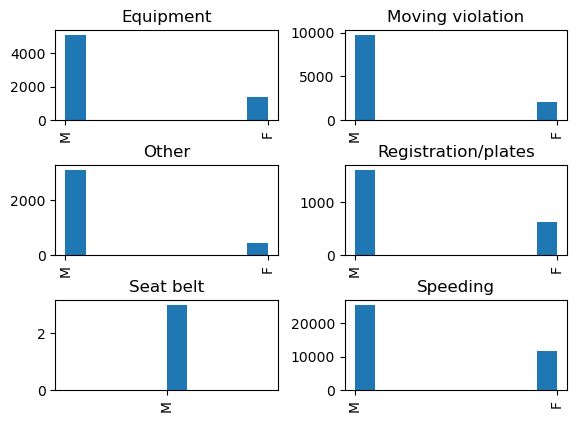

In [ ]:
my_df.hist(column='driver_gender', by='violation')

/Users/dslearner23/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

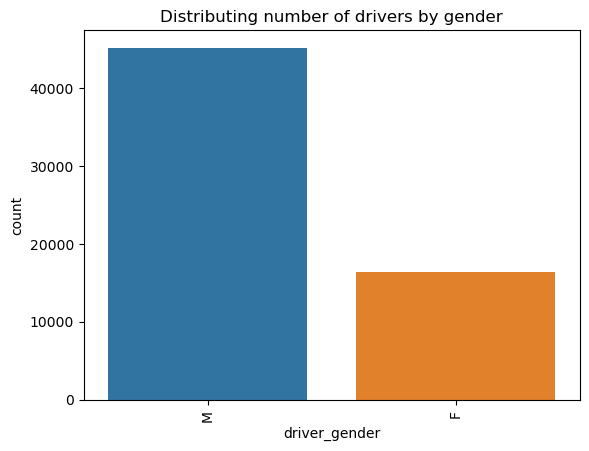

In [ ]:
sn.countplot(my_df.driver_gender)
plt.title('Distributing number of drivers by gender')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='is_arrested'>

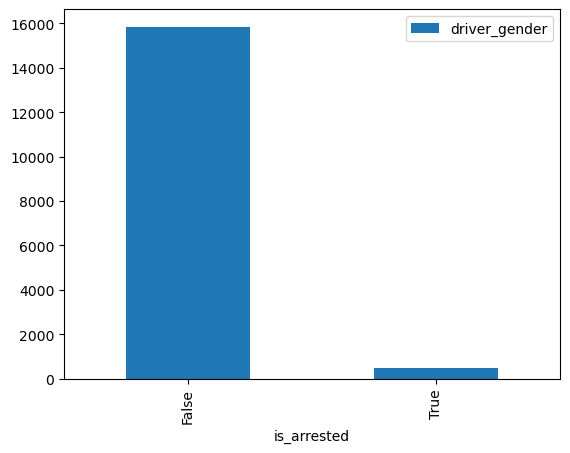

In [31]:
male = my_df[my_df['driver_gender'] == 'M'].groupby('is_arrested').count()
female = my_df[my_df['driver_gender'] == 'F'].groupby('is_arrested').count()

female.plot(y='driver_gender',kind='bar')
